In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.express import scatter

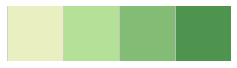

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
colors_nude = ['#E9EFC0','#B4E197','#83BD75','#4E944F'] #if wandring why greens ?to reinforce the emotion (prediction dollar$)
sns.palplot(sns.color_palette(colors_nude))
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import  mean_squared_error ,r2_score , explained_variance_score
from time import time
from sklearn.model_selection import GridSearchCV , learning_curve

In [13]:
df=pd.read_csv('Carbon Emission.csv')

In [14]:
df.shape

(10000, 20)

In [15]:
df.columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

In [16]:
df.nunique()

Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        5
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64

In [17]:
df.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [18]:
df['Vehicle Type']=df['Vehicle Type'].fillna('No Vehicle')

In [19]:
df.corr()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
Monthly Grocery Bill,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587
Vehicle Monthly Distance Km,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171
Waste Bag Weekly Count,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193
How Long TV PC Daily Hour,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985
How Many New Clothes Monthly,0.006746,0.004934,-0.003254,0.009414,1.000000,0.006426,0.198887
How Long Internet Daily Hour,0.012798,-0.003497,-0.005335,0.006804,0.006426,1.000000,0.043878
CarbonEmission,0.081587,0.594171,0.159193,0.012985,0.198887,0.043878,1.000000


In [21]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


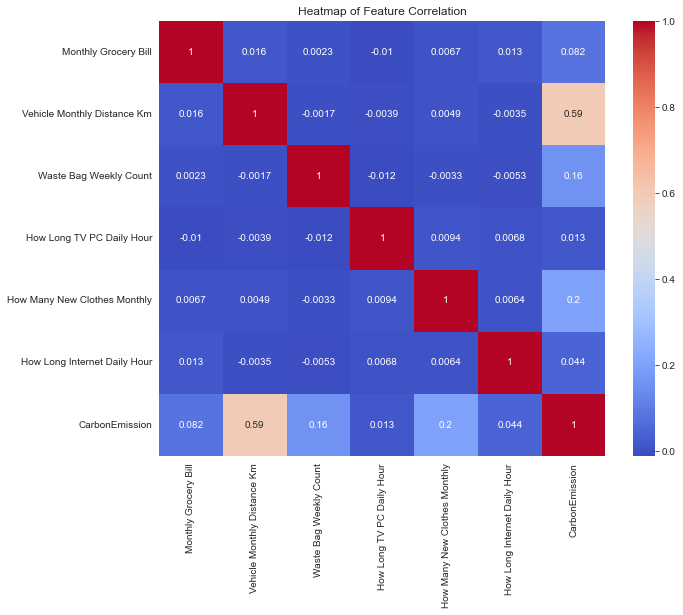

In [22]:



# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Heatmap of Feature Correlation')
plt.show()

In [23]:
pq=df.columns
pq=list(pq)

In [24]:
pq.remove('Monthly Grocery Bill')
pq.remove('Vehicle Monthly Distance Km')
pq.remove('Waste Bag Weekly Count')
pq.remove('How Long TV PC Daily Hour')
pq.remove('How Long Internet Daily Hour')
pq.remove('Recycling')
pq.remove('Cooking_With')
pq.remove('CarbonEmission')
pq.remove('How Many New Clothes Monthly')

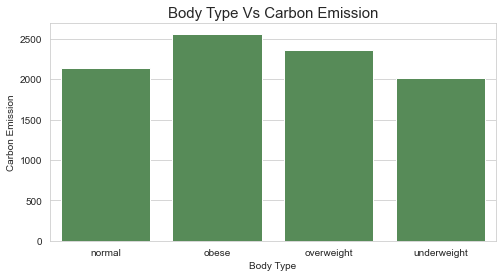

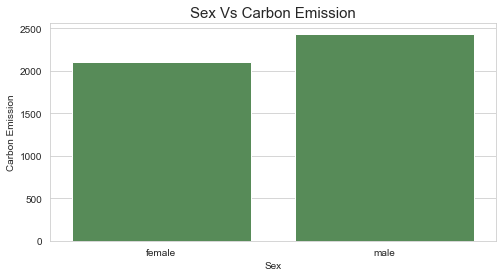

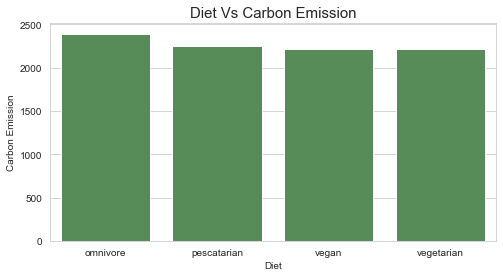

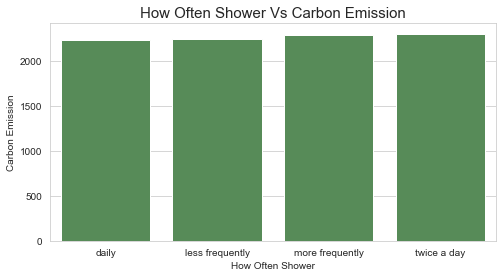

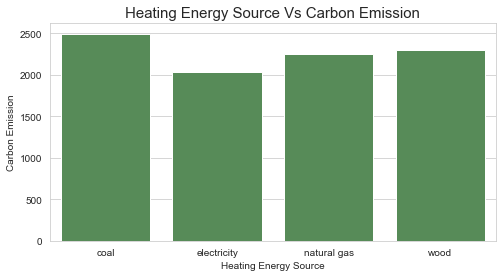

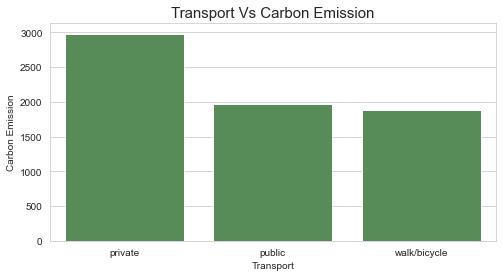

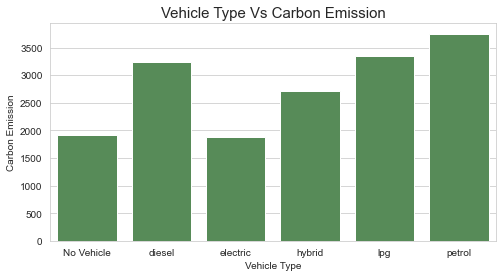

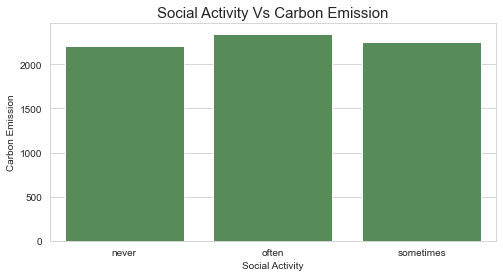

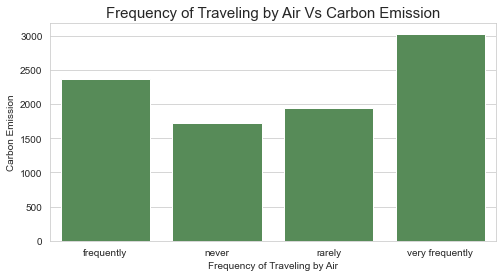

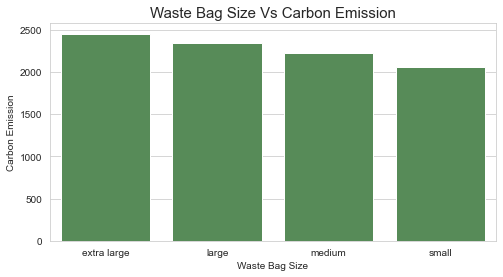

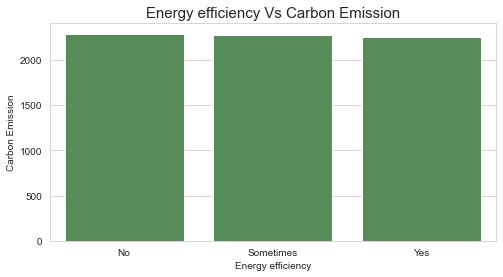

In [25]:
for i in pq:
 region_cost= df.groupby(i)['CarbonEmission'].mean() 
 fig = plt.figure(figsize=(8,4))
 sns.barplot(region_cost.index , region_cost.values,color = colors_nude[-1])
 plt.title(str(i)+' Vs Carbon Emission' ,size = 15)
 plt.ylabel('Carbon Emission')
 plt.show()

In [26]:
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,No Vehicle,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,No Vehicle,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,No Vehicle,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,No Vehicle,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


In [27]:
list_recycling=['Paper','Metal','Glass','Plastic']

In [28]:
count_recycle = np.zeros(4)

In [29]:
sum_carbon=np.zeros(4)

In [30]:
for i in range(10000):
    for j in range(4):
        if list_recycling[j] in df['Recycling'][i]:
            count_recycle[j]=count_recycle[j]+1
            sum_carbon[j]=sum_carbon[j]+df['CarbonEmission'][i]

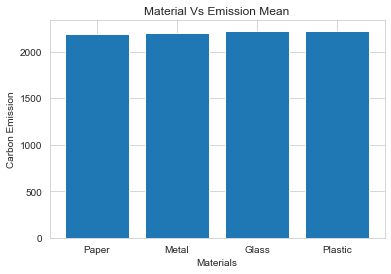

In [31]:
categories = ['Paper','Metal','Glass','Plastic']
counts = sum_carbon/count_recycle

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Materials')
plt.ylabel('Carbon Emission')
plt.title('Material Vs Emission Mean')

# Show plot
plt.show()

In [32]:
Cooking_With=['Microwave','Airfryer','Oven','Stove','Grill']

In [33]:
count_Cooking_With = np.zeros(5)

In [34]:
sum_Cooking_With=np.zeros(5)

In [35]:
for i in range(10000):
    for j in range(5):
        if Cooking_With[j] in df['Cooking_With'][i]:
            count_Cooking_With[j]=count_Cooking_With[j]+1
            sum_Cooking_With[j]=sum_Cooking_With[j]+df['CarbonEmission'][i]

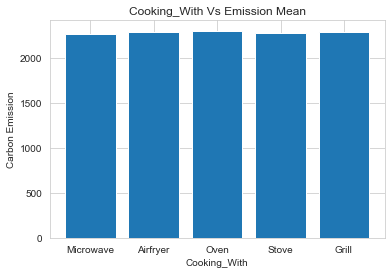

In [36]:
categories=['Microwave','Airfryer','Oven','Stove','Grill']
counts = sum_Cooking_With/count_Cooking_With

# Create bar plot
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Cooking_With')
plt.ylabel('Carbon Emission')
plt.title('Cooking_With Vs Emission Mean')

# Show plot
plt.show()

<AxesSubplot:xlabel='Vehicle Monthly Distance Km', ylabel='CarbonEmission'>

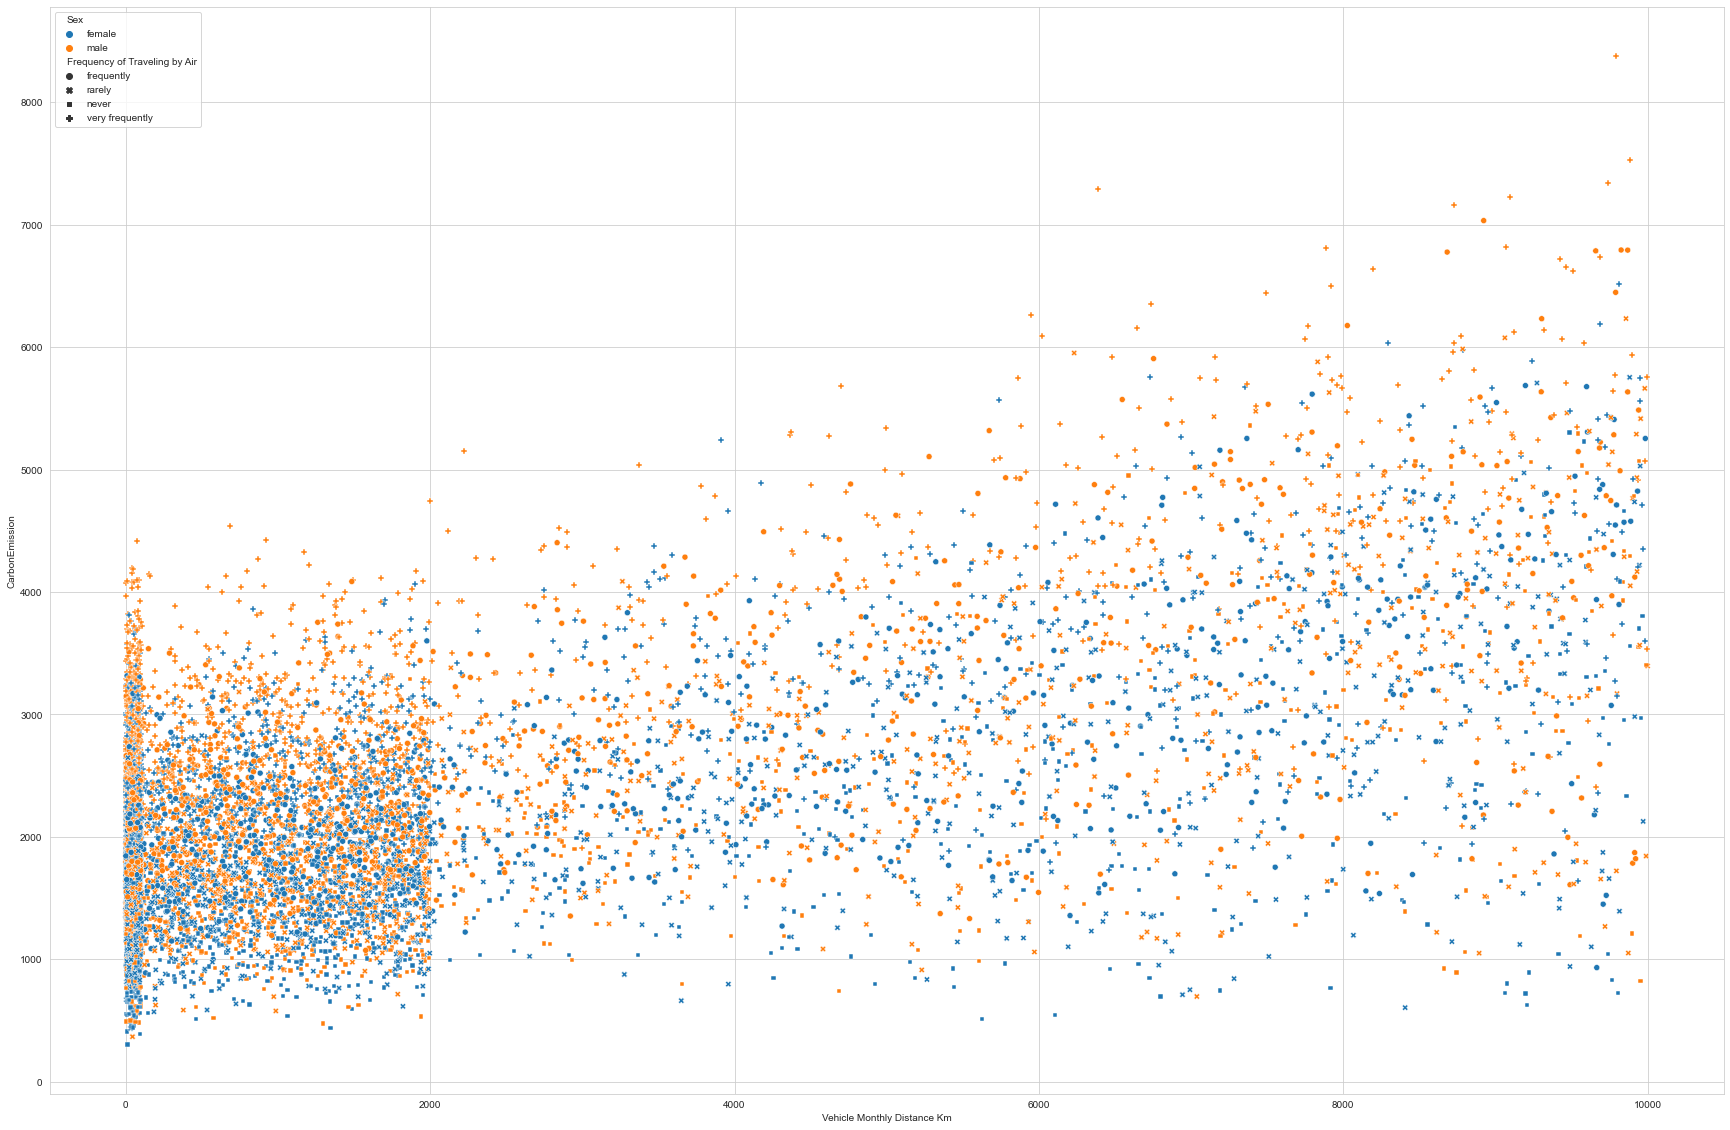

In [37]:

 fig = plt.figure(figsize=(30,20))
#  plt.scatter(df['How Long Internet Daily Hour'] , df['Waste Bag Weekly Count'], cmap = 'summer' ,c = df['CarbonEmission'] ,alpha = 0.8 )
#  plt.xlabel('Age')
#  plt.ylabel('Charges')
#  plt.colorbar(label = 'BMI')
#  plt.title('Age and Charges',size = 15);
sns.scatterplot(df['Vehicle Monthly Distance Km'],df['CarbonEmission'],hue=df['Sex'],style=df['Frequency of Traveling by Air'])

<AxesSubplot:xlabel='Vehicle Monthly Distance Km', ylabel='CarbonEmission'>

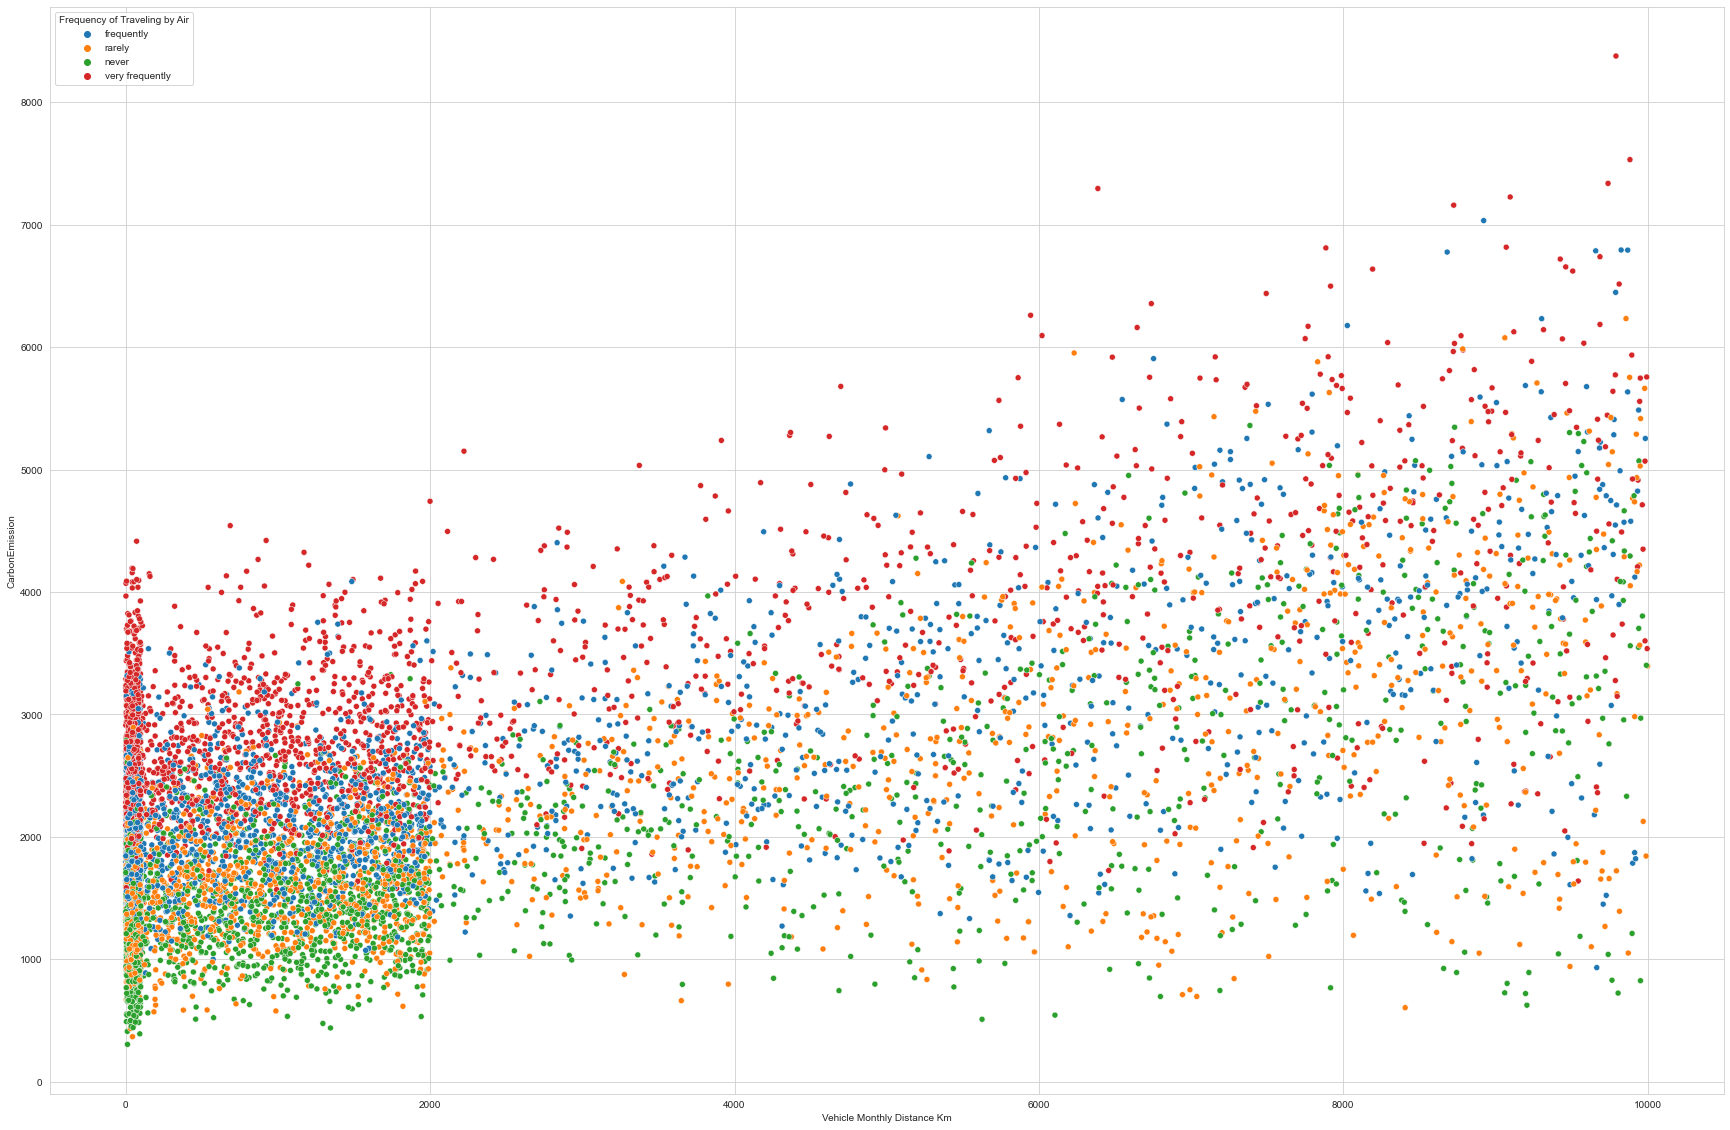

In [38]:

 fig = plt.figure(figsize=(30,20))

sns.scatterplot(df['Vehicle Monthly Distance Km'],df['CarbonEmission'],hue=df['Frequency of Traveling by Air'])

<AxesSubplot:xlabel='How Many New Clothes Monthly', ylabel='CarbonEmission'>

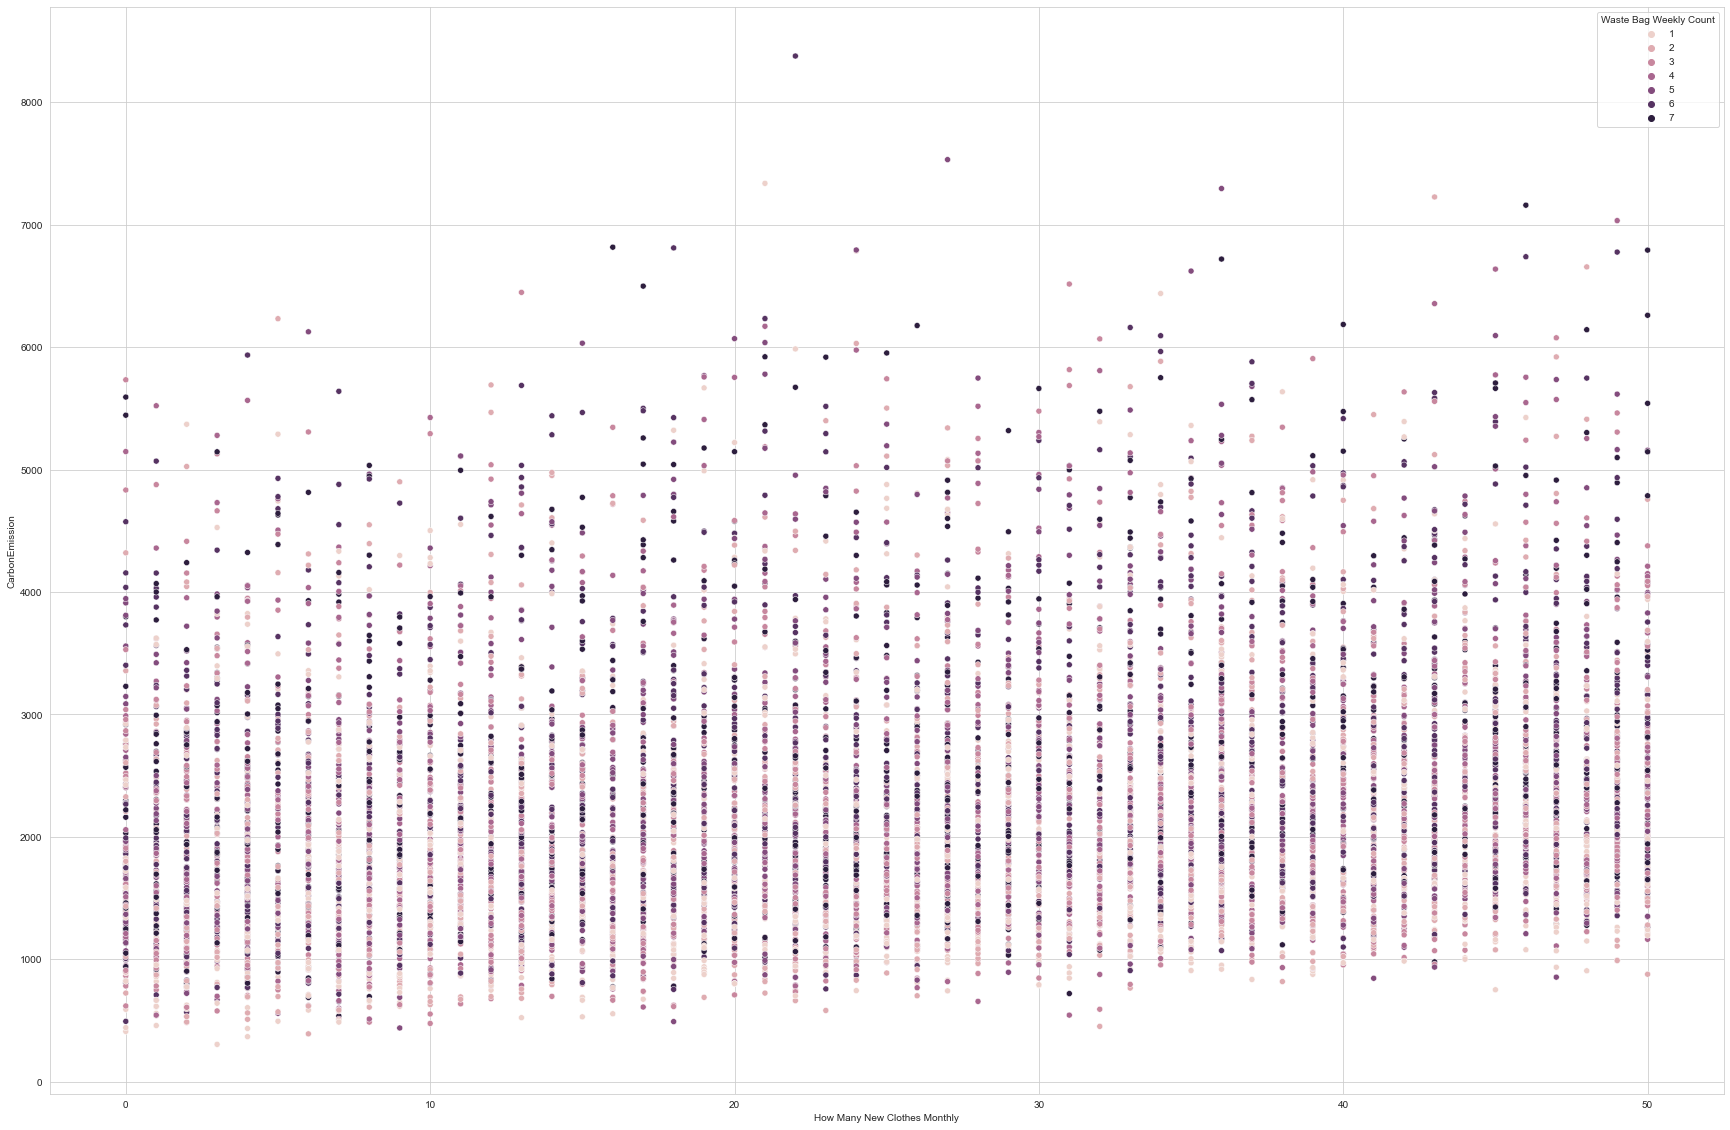

In [39]:

 fig = plt.figure(figsize=(30,20))
#  plt.scatter(df['How Long Internet Daily Hour'] , df['Waste Bag Weekly Count'], cmap = 'summer' ,c = df['CarbonEmission'] ,alpha = 0.8 )
#  plt.xlabel('Age')
#  plt.ylabel('Charges')
#  plt.colorbar(label = 'BMI')
#  plt.title('Age and Charges',size = 15);
sns.scatterplot(df['How Many New Clothes Monthly'],df['CarbonEmission'],hue=df['Waste Bag Weekly Count'])

<AxesSubplot:xlabel='How Many New Clothes Monthly', ylabel='CarbonEmission'>

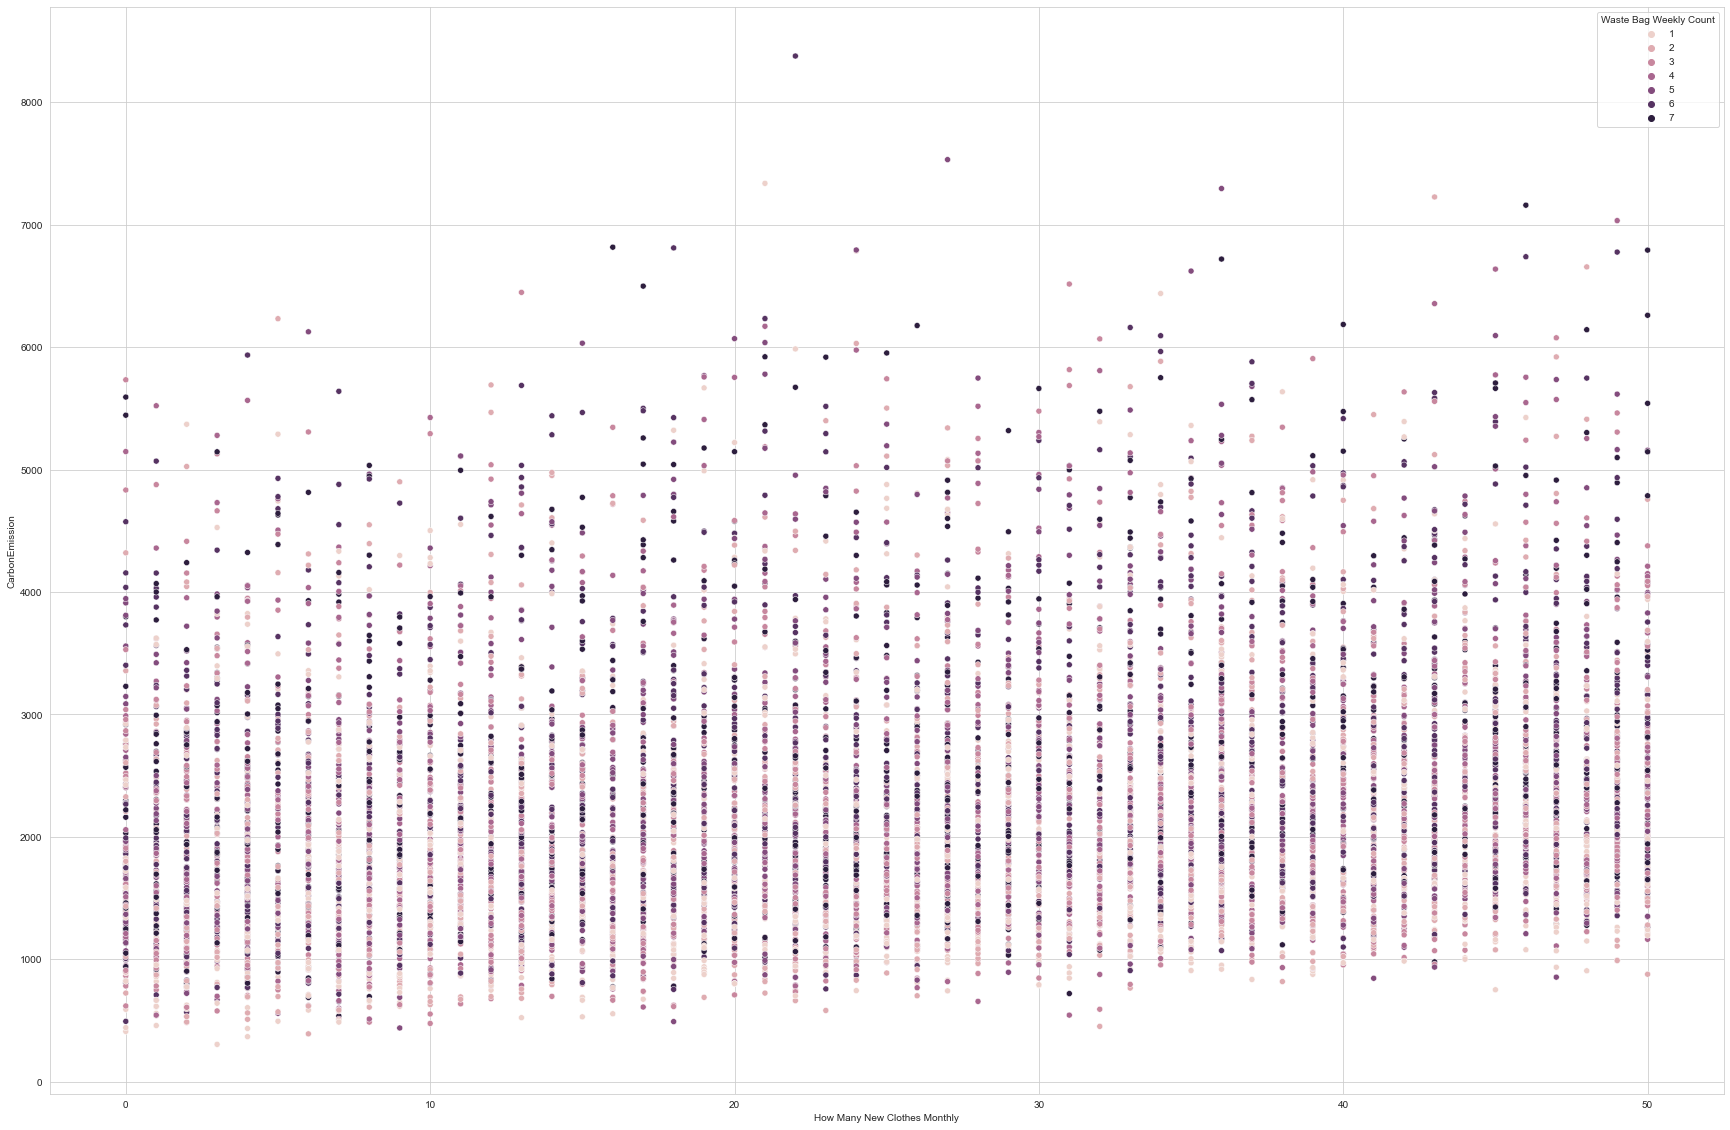

In [40]:

 fig = plt.figure(figsize=(30,20))
#  plt.scatter(df['How Long Internet Daily Hour'] , df['Waste Bag Weekly Count'], cmap = 'summer' ,c = df['CarbonEmission'] ,alpha = 0.8 )
#  plt.xlabel('Age')
#  plt.ylabel('Charges')
#  plt.colorbar(label = 'BMI')
#  plt.title('Age and Charges',size = 15);
sns.scatterplot(df['How Many New Clothes Monthly'],df['CarbonEmission'],hue=df['Waste Bag Weekly Count'])

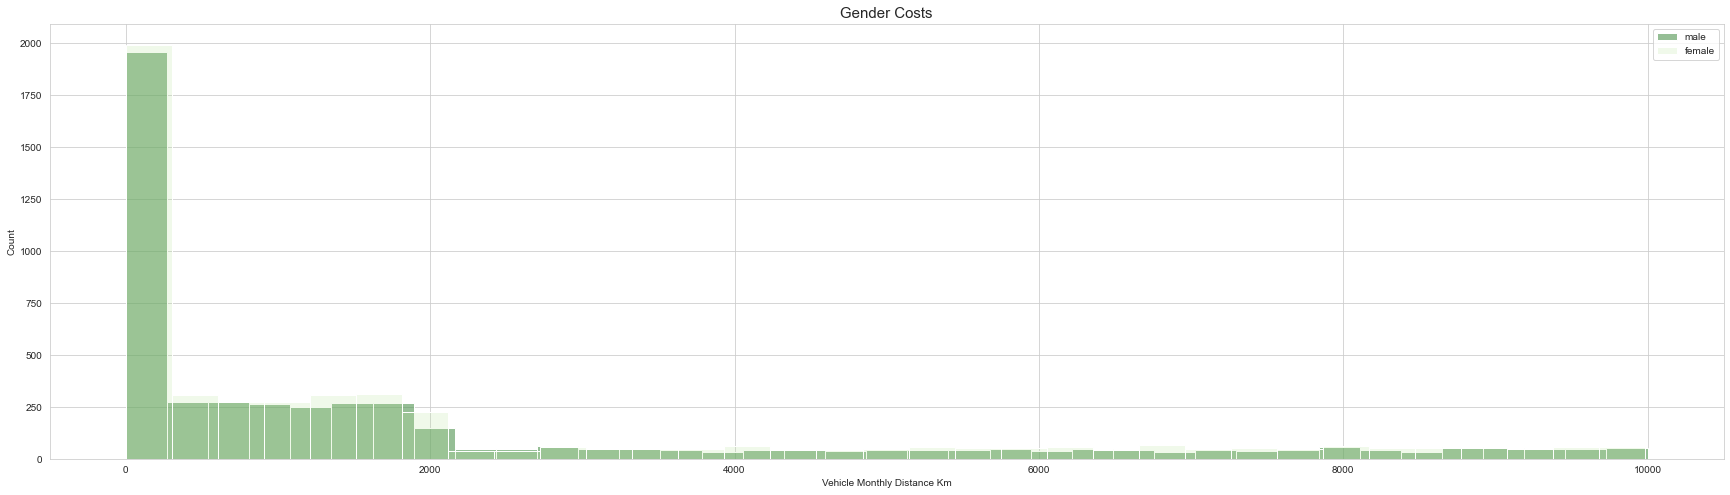

In [41]:
fig = plt.figure(figsize=(30,8))
sns.histplot(data =df[df['Sex'] =='male'] ,  x = 'Vehicle Monthly Distance Km' ,color = colors_nude[-1]  ,label = 'male' ,alpha = 0.6)
sns.histplot(data =df[df['Sex'] =='female'] ,  x = 'Vehicle Monthly Distance Km',color = colors_nude[1] ,label = 'female' ,alpha = 0.2)
plt.title('Gender Costs',size = 15)
plt.legend()
plt.show()